### Mạng nơ ron tích chập sâu AlexNet
- Mạng AlexNet được giới thiệu vào năm 2012. Mạng này gồm 8 tầng mạng nơ ron tích chập, chứng minh được rằng các đặc trưng thu được bởi việc học có thể vượt qua các đặc trưng được thiết kế thủ công, phá vỡ định kiến trước đây trong nghiên cứu thị giác máy tính. 

    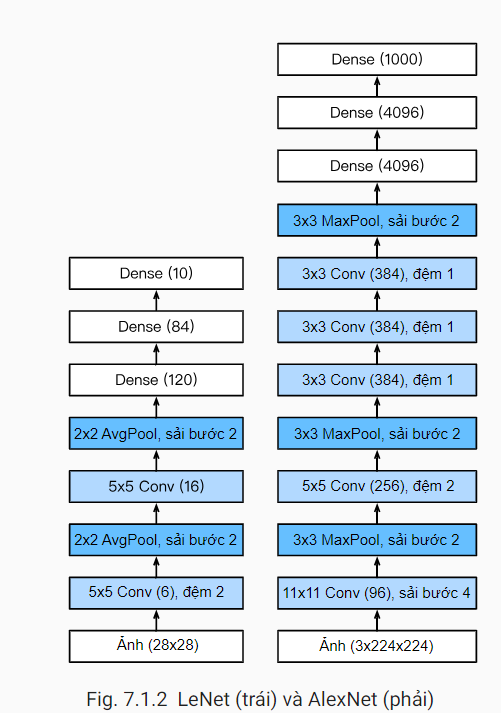

- Triết lý thiết kế của AlexNet và LeNet rất giống nhau, nhưng có những khác biệt đáng kể. Đầu tiên, AlexNet sâu hơn nhiều so với LeNet5. AlexNet có 8 tầng gồm:
    + 5 tầng tích chập
    + 2 tầng ẩn kết nối đầy đủ
    + 1 tầng đầu ra kết nối đầy đủ
    + Sử dụng làm ReLU thay vì hàm sigmoid làm hàm kích hoạt.

#### 1. Kiến trúc
- Trong tầng thứ nhất của AlexNet, kích thước của cửa sổ tích chập là 11x11. Vì hầy hết các ảnh trong ImageNet đều có chiều cao và chiều rộng lớn gấp 10 lần các ảnh trong MNIST. Do đó, ta cần sử dụng một cửa sổ tích chập lớn hơn để xác định được các vật thể này. 
- Kích thước của cửa sổ tích chập trong tầng thứ hai được giảm 5x5 và sau đó là 3x3.
- Theo sau các tầng chập thứ nhất, thứ hai và thứ 5 là tầng gộp cực đại với kích thước cửa số là 3x3 và sải bước bằng 2. Số lượng các kênh tích chập trong AlexNet nhiều hơn gấp 10 lần so với LeNet.
- Sau tầng tích chập cuối cùng là hai tầng kết nối đầy đủ với 4096 đầu ra, hai tầng này tạo ra tới gần 1GB tham số mô hình. 



#### 2. Các hàm kích hoạt
- AlexNet thay hàm kích hoạt sigmoid bằng hàm kích hoạt ReLU đơn giản hơn, một mặt là giảm việc tính toán do hàm ReLU không có phép lũy thừa như hàm sigmoid. 
- Mặt khác, hàm kích hoạt ReLU giúp cho việc huấn luyện mô hình trở nên dễ dàng hơn khi sử dụng các phương thức khởi tạo tham số khác nhau. Điều này là do khi đầu ra của hàm sigmoid rất gần với 0 hoặc 1 thì gradient sẽ gần bằng 0 -> gây ra gradient vanishing.

#### 3. Kiểm soát năng lực mô hình và Tiền xử lý
- AlexNet kiểm soát năng lực của tầng kết nối đầy đủ bằng cách áp dụng dropout trong khi LeNet chỉ sử dụng suy giảm trọng số. 
- Để tăng cường dữ liệu thì AlexNet đã bổ sung rất nhiều kỹ thuật tăng cường hình ảnh như lật, cắt hay thay đổi màu sắc. Điều này giúp cho mô hình trở nên mạnh mẽ hơn, cùng với đó kích thước dữ liệu lớn hơn giúp làm giảm hiện tương quá khớp hiệu quả.

In [6]:
from d2l import mxnet as d2l
from mxnet import np, npx, autograd, gluon, init
from mxnet.gluon import nn
npx.set_np()

In [ ]:
def AlexNet():
    net = nn.Sequential()
    net.add(
            nn.Conv2D(channels=96, kernel_size=11, strides=4, activation='relu'),
            nn.MaxPool2D(pool_size=(3, 3), strides = 2), 
            nn.Conv2D(channels=256, kernel_size=5, padding = 2, activation='relu'),
            nn.MaxPool2D(pool_size=3, strides = 2),
            nn.Conv2D(channels=384, kernel_size=3, padding = 1, activation='relu'),
            nn.Conv2D(channels=384, kernel_size=3, padding = 1, activation='relu'),
            nn.Conv2D(channels=384, kernel_size=3, padding = 1, activation='relu'),
            nn.MaxPool2D(pool_size = (3, 3), strides = 2),
            nn.Dense(4096, activation='relu'), nn.Dropout(0.5),
            nn.Dense(4096, activation='relu'), nn.Dropout(0.5),
            nn.Dense(1000)
        )
    net.initialize(init = init.Xavier())
    return net

In [16]:
net = AlexNet()
X = np.random.uniform(size=(1, 1, 224, 224))
for layer in net.net:
    X = layer(X)
    print(layer.name, 'output shape:\t', X.shape)

net(X)

conv17 output shape:	 (1, 96, 54, 54)
pool11 output shape:	 (1, 96, 26, 26)
conv18 output shape:	 (1, 256, 26, 26)
pool12 output shape:	 (1, 256, 12, 12)
conv19 output shape:	 (1, 384, 12, 12)
conv20 output shape:	 (1, 384, 12, 12)
conv21 output shape:	 (1, 384, 12, 12)
pool13 output shape:	 (1, 384, 5, 5)
dense9 output shape:	 (1, 4096)
dropout6 output shape:	 (1, 4096)
dense10 output shape:	 (1, 4096)
dropout7 output shape:	 (1, 4096)
dense11 output shape:	 (1, 1000)


MXNetError: [20:46:09] C:\Jenkins\workspace\mxnet-tag\mxnet\src\operator\nn\convolution.cc:152: Check failed: dshp.ndim() == 4U (2 vs. 4) : Input data should be 4D in batch-num_filter-y-x